Podemos clasificar de dos formas, mediante discriminación o asignando probabilidades. Discriminando, asignamos a cada $x$ una de las $K$ clases $C_k$. Por contra, desde un punto de vista probabilístico, lo que haríamos es asignar a cada $x$ la probabilidad de pertenecer a la clase $C_k$. El tipo de clasificación que realicemos es a discreción del usuario y muchas veces dependerá de la distribución de los datos o de los requisitos que nos imponga el cliente. Por ejemplo, hay campeonatos en Kaggle donde lo que se pide es identificar la clase —[Digit Recognizer](http://www.kaggle.com/c/digit-recognizer/data)—, pero también puede ser un requisito el determinar la probabilidad de pertecer a una clase determinada —[Otto Group Product Classification Challenge](http://www.kaggle.com/c/otto-group-product-classification-challenge/details/evaluation).

En scikit-learn podemos obtener clasificaciones de ambas maneras una vez entrenado el modelo.

+ `modelo.predict()`, para asignar una categoría.
+ `modelo.predict_proba()`, para determinar la probabilidad de pertenencia.

Aquí nos centraremos en la parte probabilística, que espero nos dé una visión más ampliar, y a su vez nos servirá para asignar una categoría si definimos un [hiperplano](http://es.wikipedia.org/wiki/Hiperplano).

Para modelos probabilísticos lo más conveniente, en el caso de contar con dos categorías, es la representación binaria donde contamos con una única variable objetivo $t \in \{0,1\}$ tal que $t=0$ representa la clase $C_1$ y $t=1$ representa la clase $C_2$. Podemos considerar que el valor de $t$ representa la probabilidad de que la clase sea $C_2$, con los valores de probabilidad tomando valores entre $0$ y $1$.

Veamos un ejemplo.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Con la función `make_classification` de scikit-learn, creamos un conjunto de datos para clasificar. Para empezar vamos a contar con sólo un atributo o *feature* y dos clases o categorías. Los categorías van a estar separadas, pero permitiremos un cierto grado de solapamiento a través del parámetro `class_sep`; así, la clasificación probabilística cobra más sentido.

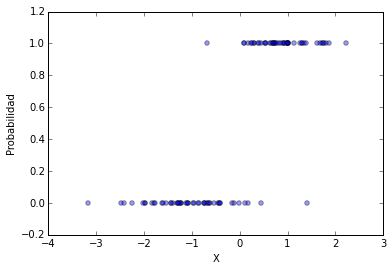

In [2]:
X, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.9, random_state=27)
plt.scatter(X, y, alpha=0.4)
plt.xlabel('X')
plt.ylabel('Probabilidad')

En regresión logística los que vamos a hacer es calcular las probabilidades $p(C_k|x)$. La función logística o [sigmoide](http://es.wikipedia.org/wiki/Función_sigmoide) nos va a permitir definir esas probabilidades y viene definida como

$$f(x) = \frac{1}{1 + \exp(-k(x-x_0))} $$

Como veremos a continuación, la sigmoide tiene forma de *S* y la función logística juega un papel muy importante en muchos algoritmos de clasificación. Pero no es la única función de ese tipo; también podemos encontrarnos las función arcotangente, tangente hiperbólica o [softmax](http://en.wikipedia.org/wiki/Softmax_function) entre otras.

Como es costumbre en scikit-learn, primero definimos el modelo que vamos a emplear que será `LogisticRegression`. Lo cargamos con los parámetros por defecto y lo entrenamos.

In [3]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

Por defecto nos va a imprimir los parámetros con los que se ha entrenado el modelo. Una vez entrenado podemos predecir las probabilidades de pertenencia a cada categoría. Para ello, como ya hemos dicho, utilizaremos la función `predict_proba()` que toma como datos de entrada los atributos *X*.

Lo que nos devuelve la función `predict_proba()` es un array de dimensiones (n atributos, n clases). A nosotros sólo nos va a interesar representar la segunda columna, es decir, $p(C_1|x)$, pues sabemos que $p(C_1|x) = 1 - p(C_0|x)$.

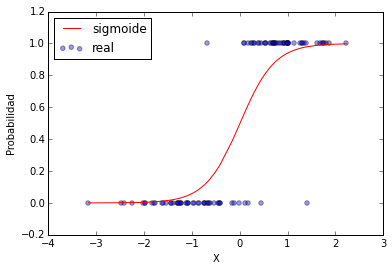

In [4]:
plt.scatter(X, y, alpha=0.4, label='real')
plt.plot(np.sort(X, axis=0), lr.predict_proba(np.sort(X, axis=0))[:,1], color='r', label='sigmoide')
plt.legend(loc=2)
plt.xlabel('X')
plt.ylabel('Probabilidad')

Se aprecia claramente la curva en forma de *S* de la función logística que es lo que estábamos buscando. Esto nos dice que un punto con $x=0$ tiene aproximadamente un 50 % de probabilidades de pertenecer a cualquiera de las dos categorías.

Si a partir de las probabilidades quisiesemos hacer una clasificación por categorías no tendríamos más que definir un valor umbral. Es decir, cuando la función logística asigna una probabilidad mayor a, por ejemplo, 0.5 entonces asignamos esa categoría. Eso es básicamente lo que hace `predict` tal y como podemos ver a continuación.

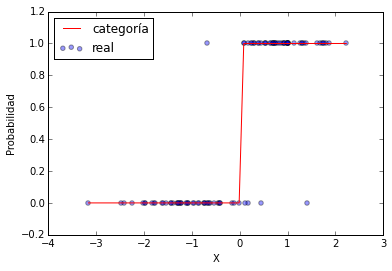

In [5]:
plt.scatter(X, y, alpha=0.4, label='real')
plt.plot(np.sort(X, axis=0), lr.predict(np.sort(X, axis=0)), color='r', label='categoría')
plt.legend(loc=2)
plt.xlabel('X')
plt.ylabel('Probabilidad')